In [1]:
import pandas as pd 
import numpy as np
import math
import keras
import tensorflow as tf
print(pd.__version__)
import progressbar
import os
from os import listdir

1.2.3


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.21.0

pandas    : 1.2.3
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.1
matplotlib: 3.3.4
h5py      : 2.10.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 5.8.0-45-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Wed Mar 17 2021 11:47:27CET



## Load of the data

   You can also load all of them! Writing "all_data"

In [3]:
os.listdir('../data/classifier/')

['inverse-compton.csv',
 '250.csv',
 '100-high-ene.csv',
 'latest.csv',
 '50.csv',
 '100.csv']

In [4]:
n = input('Which file do you want?')

Which file do you want?latest


In [5]:
if (n != 'all_data'): 
    print(2)

2


In [6]:
from process import loaddata
if n != 'all_data': 
    class_data = loaddata("../data/classifier/{}.csv".format(n))
if n == 'all_data': 
    files = os.listdir('../data/classifier/')
    for filename in files:
        class_data = loaddata("../data/classifier/{}".format(filename))

In [7]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [8]:
x.shape

(162000, 10)

In [9]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 121500 
Valuation sample: 40500


In [10]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [12]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [13]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_dropout.h5".format(n))

Epoch 1/1000
13/13 [==============================] - 2s 57ms/step - loss: 0.7346 - accuracy: 0.4996 - val_loss: 0.6948 - val_accuracy: 0.5144
Epoch 2/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.7151 - accuracy: 0.5054 - val_loss: 0.6914 - val_accuracy: 0.5221
Epoch 3/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.7038 - accuracy: 0.5077 - val_loss: 0.6879 - val_accuracy: 0.5257
Epoch 4/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.6969 - accuracy: 0.5088 - val_loss: 0.6838 - val_accuracy: 0.5450
Epoch 5/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.6902 - accuracy: 0.5227 - val_loss: 0.6793 - val_accuracy: 0.5942
Epoch 6/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.6859 - accuracy: 0.5374 - val_loss: 0.6745 - val_accuracy: 0.6389
Epoch 7/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.6804 - accuracy: 0.5564 - val_loss: 0.6678 - val_accuracy: 0.6735

Epoch 51/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.1472 - accuracy: 0.9617 - val_loss: 0.1072 - val_accuracy: 0.9758
Epoch 52/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.1451 - accuracy: 0.9614 - val_loss: 0.1039 - val_accuracy: 0.9767
Epoch 53/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.1405 - accuracy: 0.9638 - val_loss: 0.1006 - val_accuracy: 0.9769
Epoch 54/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.1372 - accuracy: 0.9635 - val_loss: 0.0977 - val_accuracy: 0.9780
Epoch 55/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.1332 - accuracy: 0.9648 - val_loss: 0.0948 - val_accuracy: 0.9784
Epoch 56/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.1283 - accuracy: 0.9666 - val_loss: 0.0926 - val_accuracy: 0.9796
Epoch 57/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.1284 - accuracy: 0.9664 - val_loss: 0.0896 - val_accuracy:

Epoch 108/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0533 - accuracy: 0.9866 - val_loss: 0.0381 - val_accuracy: 0.9906
Epoch 109/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.0544 - accuracy: 0.9867 - val_loss: 0.0379 - val_accuracy: 0.9900
Epoch 110/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0532 - accuracy: 0.9864 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 111/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.0533 - accuracy: 0.9867 - val_loss: 0.0375 - val_accuracy: 0.9896
Epoch 112/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0534 - accuracy: 0.9858 - val_loss: 0.0369 - val_accuracy: 0.9901
Epoch 113/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0525 - accuracy: 0.9866 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 114/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.0517 - accuracy: 0.9866 - val_loss: 0.0363 - val_ac

13/13 [==============================] - 0s 17ms/step - loss: 0.0335 - accuracy: 0.9917 - val_loss: 0.0237 - val_accuracy: 0.9937
Epoch 165/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.9911 - val_loss: 0.0234 - val_accuracy: 0.9937
Epoch 166/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.9914 - val_loss: 0.0233 - val_accuracy: 0.9937
Epoch 167/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0352 - accuracy: 0.9914 - val_loss: 0.0237 - val_accuracy: 0.9935
Epoch 168/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0339 - accuracy: 0.9915 - val_loss: 0.0230 - val_accuracy: 0.9936
Epoch 169/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.0230 - val_accuracy: 0.9943
Epoch 170/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0348 - accuracy: 0.9916 - val_loss: 0.0233 - val_accuracy: 0.9935


13/13 [==============================] - 0s 16ms/step - loss: 0.0287 - accuracy: 0.9930 - val_loss: 0.0186 - val_accuracy: 0.9949
Epoch 221/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0278 - accuracy: 0.9931 - val_loss: 0.0187 - val_accuracy: 0.9949
Epoch 222/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0272 - accuracy: 0.9935 - val_loss: 0.0194 - val_accuracy: 0.9943
Epoch 223/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0292 - accuracy: 0.9929 - val_loss: 0.0189 - val_accuracy: 0.9946
Epoch 224/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0274 - accuracy: 0.9932 - val_loss: 0.0184 - val_accuracy: 0.9949
Epoch 225/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0263 - accuracy: 0.9934 - val_loss: 0.0190 - val_accuracy: 0.9945
Epoch 226/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0281 - accuracy: 0.9933 - val_loss: 0.0183 - val_accuracy: 0.9951


13/13 [==============================] - 0s 19ms/step - loss: 0.0228 - accuracy: 0.9946 - val_loss: 0.0159 - val_accuracy: 0.9960
Epoch 277/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0235 - accuracy: 0.9946 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 278/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0245 - accuracy: 0.9943 - val_loss: 0.0163 - val_accuracy: 0.9953
Epoch 279/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0242 - accuracy: 0.9942 - val_loss: 0.0173 - val_accuracy: 0.9950
Epoch 280/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0245 - accuracy: 0.9936 - val_loss: 0.0162 - val_accuracy: 0.9955
Epoch 281/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0235 - accuracy: 0.9945 - val_loss: 0.0159 - val_accuracy: 0.9957
Epoch 282/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0231 - accuracy: 0.9946 - val_loss: 0.0162 - val_accuracy: 0.9953


13/13 [==============================] - 0s 16ms/step - loss: 0.0211 - accuracy: 0.9949 - val_loss: 0.0149 - val_accuracy: 0.9960
Epoch 333/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0211 - accuracy: 0.9950 - val_loss: 0.0152 - val_accuracy: 0.9957
Epoch 334/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0212 - accuracy: 0.9948 - val_loss: 0.0146 - val_accuracy: 0.9964
Epoch 335/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0216 - accuracy: 0.9950 - val_loss: 0.0149 - val_accuracy: 0.9961
Epoch 336/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0209 - accuracy: 0.9951 - val_loss: 0.0146 - val_accuracy: 0.9962
Epoch 337/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0145 - val_accuracy: 0.9965
Epoch 338/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0221 - accuracy: 0.9949 - val_loss: 0.0152 - val_accuracy: 0.9959


13/13 [==============================] - 0s 16ms/step - loss: 0.0204 - accuracy: 0.9952 - val_loss: 0.0145 - val_accuracy: 0.9960
Epoch 389/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0199 - accuracy: 0.9952 - val_loss: 0.0142 - val_accuracy: 0.9964
Epoch 390/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0197 - accuracy: 0.9953 - val_loss: 0.0138 - val_accuracy: 0.9966
Epoch 391/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0204 - accuracy: 0.9953 - val_loss: 0.0140 - val_accuracy: 0.9964
Epoch 392/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0195 - accuracy: 0.9955 - val_loss: 0.0143 - val_accuracy: 0.9962
Epoch 393/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0184 - accuracy: 0.9956 - val_loss: 0.0138 - val_accuracy: 0.9965
Epoch 394/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0192 - accuracy: 0.9956 - val_loss: 0.0141 - val_accuracy: 0.9963


13/13 [==============================] - 0s 18ms/step - loss: 0.0189 - accuracy: 0.9958 - val_loss: 0.0132 - val_accuracy: 0.9968
Epoch 445/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0190 - accuracy: 0.9956 - val_loss: 0.0137 - val_accuracy: 0.9965
Epoch 446/1000
13/13 [==============================] - ETA: 0s - loss: 0.0174 - accuracy: 0.99 - 0s 16ms/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.0139 - val_accuracy: 0.9965
Epoch 447/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0185 - accuracy: 0.9956 - val_loss: 0.0133 - val_accuracy: 0.9967
Epoch 448/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0177 - accuracy: 0.9960 - val_loss: 0.0132 - val_accuracy: 0.9968
Epoch 449/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.0138 - val_accuracy: 0.9964
Epoch 450/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0179 - accuracy: 0.9958 

13/13 [==============================] - 0s 15ms/step - loss: 0.0166 - accuracy: 0.9960 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 501/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.0131 - val_accuracy: 0.9969
Epoch 502/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0128 - val_accuracy: 0.9969
Epoch 503/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0165 - accuracy: 0.9963 - val_loss: 0.0132 - val_accuracy: 0.9968
Epoch 504/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.0144 - val_accuracy: 0.9964
Epoch 505/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0174 - accuracy: 0.9959 - val_loss: 0.0136 - val_accuracy: 0.9967
Epoch 506/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.0175 - accuracy: 0.9959 - val_loss: 0.0130 - val_accuracy: 0.9968


13/13 [==============================] - 0s 30ms/step - loss: 0.0172 - accuracy: 0.9962 - val_loss: 0.0128 - val_accuracy: 0.9971
Epoch 557/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0134 - val_accuracy: 0.9969
Epoch 558/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.0130 - val_accuracy: 0.9970
Epoch 559/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0161 - accuracy: 0.9964 - val_loss: 0.0127 - val_accuracy: 0.9970
Epoch 560/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0163 - accuracy: 0.9963 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 561/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.0137 - val_accuracy: 0.9967
Epoch 562/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0170 - accuracy: 0.9960 - val_loss: 0.0130 - val_accuracy: 0.9969


13/13 [==============================] - 0s 15ms/step - loss: 0.0172 - accuracy: 0.9961 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 613/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0153 - accuracy: 0.9964 - val_loss: 0.0128 - val_accuracy: 0.9969
Epoch 614/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0165 - accuracy: 0.9962 - val_loss: 0.0127 - val_accuracy: 0.9969
Epoch 615/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0164 - accuracy: 0.9961 - val_loss: 0.0124 - val_accuracy: 0.9970
Epoch 616/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.0154 - accuracy: 0.9965 - val_loss: 0.0133 - val_accuracy: 0.9967
Epoch 617/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.0131 - val_accuracy: 0.9968
Epoch 618/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.0125 - val_accuracy: 0.9970


13/13 [==============================] - 0s 12ms/step - loss: 0.0159 - accuracy: 0.9962 - val_loss: 0.0124 - val_accuracy: 0.9970
Epoch 669/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0124 - val_accuracy: 0.9971
Epoch 670/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0149 - accuracy: 0.9965 - val_loss: 0.0127 - val_accuracy: 0.9969
Epoch 671/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.0124 - val_accuracy: 0.9971
Epoch 672/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 673/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0159 - accuracy: 0.9964 - val_loss: 0.0133 - val_accuracy: 0.9968
Epoch 674/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0158 - accuracy: 0.9964 - val_loss: 0.0132 - val_accuracy: 0.9967


13/13 [==============================] - 0s 12ms/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.0133 - val_accuracy: 0.9968
Epoch 725/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.0131 - val_accuracy: 0.9968
Epoch 726/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 727/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0156 - accuracy: 0.9964 - val_loss: 0.0122 - val_accuracy: 0.9971
Epoch 728/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0121 - val_accuracy: 0.9972
Epoch 729/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0152 - accuracy: 0.9965 - val_loss: 0.0124 - val_accuracy: 0.9972
Epoch 730/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0156 - accuracy: 0.9965 - val_loss: 0.0121 - val_accuracy: 0.9973


13/13 [==============================] - 0s 17ms/step - loss: 0.0153 - accuracy: 0.9965 - val_loss: 0.0121 - val_accuracy: 0.9972
Epoch 781/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0148 - accuracy: 0.9966 - val_loss: 0.0123 - val_accuracy: 0.9970
Epoch 782/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0136 - accuracy: 0.9968 - val_loss: 0.0119 - val_accuracy: 0.9971
Epoch 783/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0142 - accuracy: 0.9968 - val_loss: 0.0124 - val_accuracy: 0.9971
Epoch 784/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0150 - accuracy: 0.9967 - val_loss: 0.0121 - val_accuracy: 0.9970
Epoch 785/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0143 - accuracy: 0.9967 - val_loss: 0.0126 - val_accuracy: 0.9969
Epoch 786/1000
13/13 [==============================] - 0s 18ms/step - loss: 0.0140 - accuracy: 0.9967 - val_loss: 0.0120 - val_accuracy: 0.9973


13/13 [==============================] - 0s 16ms/step - loss: 0.0142 - accuracy: 0.9969 - val_loss: 0.0122 - val_accuracy: 0.9972
Epoch 837/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.0122 - val_accuracy: 0.9972
Epoch 838/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 0.0119 - val_accuracy: 0.9974
Epoch 839/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0123 - val_accuracy: 0.9971
Epoch 840/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.0117 - val_accuracy: 0.9973
Epoch 841/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.0141 - accuracy: 0.9968 - val_loss: 0.0118 - val_accuracy: 0.9972
Epoch 842/1000
13/13 [==============================] - 0s 25ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.0119 - val_accuracy: 0.9972


13/13 [==============================] - 0s 11ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0115 - val_accuracy: 0.9973
Epoch 893/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 894/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0123 - val_accuracy: 0.9971
Epoch 895/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0116 - val_accuracy: 0.9974
Epoch 896/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.0119 - val_accuracy: 0.9972
Epoch 897/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0139 - accuracy: 0.9968 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 898/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.0118 - val_accuracy: 0.9972
E

13/13 [==============================] - 0s 12ms/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.0114 - val_accuracy: 0.9974
Epoch 949/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0139 - accuracy: 0.9970 - val_loss: 0.0118 - val_accuracy: 0.9973
Epoch 950/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0140 - accuracy: 0.9967 - val_loss: 0.0128 - val_accuracy: 0.9968
Epoch 951/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0135 - accuracy: 0.9970 - val_loss: 0.0119 - val_accuracy: 0.9972
Epoch 952/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.0120 - val_accuracy: 0.9971
Epoch 953/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0137 - accuracy: 0.9970 - val_loss: 0.0119 - val_accuracy: 0.9971
Epoch 954/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0122 - val_accuracy: 0.9971


## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

<ipython-input-14-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


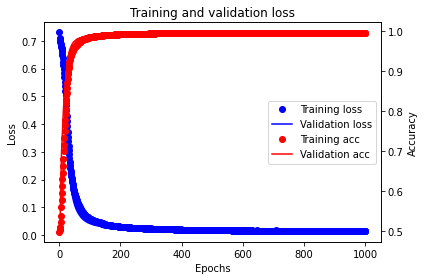

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

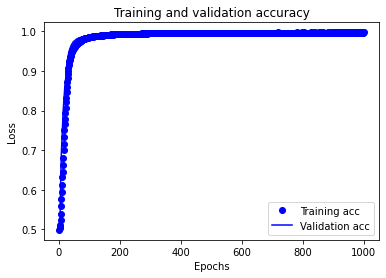

In [15]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [17]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 1000, batch_size = 10000 , validation_data = (x_val, y_val) )
model.save("../models/classifier/{}_nodropout.h5".format(n))

Epoch 1/1000
13/13 [==============================] - 1s 34ms/step - loss: 0.7745 - accuracy: 0.4902 - val_loss: 0.7393 - val_accuracy: 0.4846
Epoch 2/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.7350 - accuracy: 0.4838 - val_loss: 0.7283 - val_accuracy: 0.4845
Epoch 3/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.7242 - accuracy: 0.4866 - val_loss: 0.7170 - val_accuracy: 0.4929
Epoch 4/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.7139 - accuracy: 0.4947 - val_loss: 0.7094 - val_accuracy: 0.4974
Epoch 5/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.7073 - accuracy: 0.4973 - val_loss: 0.7029 - val_accuracy: 0.5021
Epoch 6/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.7012 - accuracy: 0.5043 - val_loss: 0.6976 - val_accuracy: 0.5089
Epoch 7/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.6956 - accuracy: 0.5135 - val_loss: 0.6928 - val_accuracy: 0.5173

Epoch 51/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0898 - accuracy: 0.9800 - val_loss: 0.0876 - val_accuracy: 0.9790
Epoch 52/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0870 - accuracy: 0.9806 - val_loss: 0.0848 - val_accuracy: 0.9806
Epoch 53/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0834 - accuracy: 0.9808 - val_loss: 0.0826 - val_accuracy: 0.9827
Epoch 54/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 0.9818 - val_loss: 0.0798 - val_accuracy: 0.9816
Epoch 55/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0791 - accuracy: 0.9823 - val_loss: 0.0775 - val_accuracy: 0.9814
Epoch 56/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.0766 - accuracy: 0.9830 - val_loss: 0.0753 - val_accuracy: 0.9819
Epoch 57/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.0745 - accuracy: 0.9831 - val_loss: 0.0735 - val_accuracy:

Epoch 108/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0332 - accuracy: 0.9915 - val_loss: 0.0339 - val_accuracy: 0.9916
Epoch 109/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0328 - accuracy: 0.9918 - val_loss: 0.0336 - val_accuracy: 0.9913
Epoch 110/1000
13/13 [==============================] - 0s 17ms/step - loss: 0.0330 - accuracy: 0.9919 - val_loss: 0.0335 - val_accuracy: 0.9917
Epoch 111/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0325 - accuracy: 0.9917 - val_loss: 0.0331 - val_accuracy: 0.9910
Epoch 112/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 0.9919 - val_loss: 0.0332 - val_accuracy: 0.9922
Epoch 113/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0320 - accuracy: 0.9923 - val_loss: 0.0325 - val_accuracy: 0.9918
Epoch 114/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0311 - accuracy: 0.9923 - val_loss: 0.0323 - val_ac

13/13 [==============================] - 0s 12ms/step - loss: 0.0232 - accuracy: 0.9935 - val_loss: 0.0236 - val_accuracy: 0.9933
Epoch 165/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0230 - accuracy: 0.9936 - val_loss: 0.0234 - val_accuracy: 0.9939
Epoch 166/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0223 - accuracy: 0.9938 - val_loss: 0.0237 - val_accuracy: 0.9943
Epoch 167/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0226 - accuracy: 0.9941 - val_loss: 0.0239 - val_accuracy: 0.9926
Epoch 168/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0229 - accuracy: 0.9935 - val_loss: 0.0232 - val_accuracy: 0.9940
Epoch 169/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0231 - val_accuracy: 0.9939
Epoch 170/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.0229 - val_accuracy: 0.9937


13/13 [==============================] - 0s 20ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.0191 - val_accuracy: 0.9949
Epoch 221/1000
13/13 [==============================] - 0s 22ms/step - loss: 0.0185 - accuracy: 0.9950 - val_loss: 0.0191 - val_accuracy: 0.9946
Epoch 222/1000
13/13 [==============================] - 0s 20ms/step - loss: 0.0177 - accuracy: 0.9947 - val_loss: 0.0192 - val_accuracy: 0.9953
Epoch 223/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0184 - accuracy: 0.9950 - val_loss: 0.0196 - val_accuracy: 0.9939
Epoch 224/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0186 - accuracy: 0.9945 - val_loss: 0.0190 - val_accuracy: 0.9952
Epoch 225/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0185 - accuracy: 0.9949 - val_loss: 0.0190 - val_accuracy: 0.9945
Epoch 226/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0172 - accuracy: 0.9953 - val_loss: 0.0188 - val_accuracy: 0.9952
E

Epoch 277/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0164 - val_accuracy: 0.9956
Epoch 278/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.0163 - val_accuracy: 0.9957
Epoch 279/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0164 - val_accuracy: 0.9954
Epoch 280/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0154 - accuracy: 0.9956 - val_loss: 0.0163 - val_accuracy: 0.9956
Epoch 281/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0163 - val_accuracy: 0.9957
Epoch 282/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0150 - accuracy: 0.9959 - val_loss: 0.0169 - val_accuracy: 0.9950
Epoch 283/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.0167 - val_accuracy

Epoch 334/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 0.0152 - val_accuracy: 0.9960
Epoch 335/1000
13/13 [==============================] - 0s 21ms/step - loss: 0.0138 - accuracy: 0.9961 - val_loss: 0.0150 - val_accuracy: 0.9955
Epoch 336/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.9960 - val_loss: 0.0146 - val_accuracy: 0.9960
Epoch 337/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0147 - val_accuracy: 0.9959
Epoch 338/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0147 - val_accuracy: 0.9957
Epoch 339/1000
13/13 [==============================] - 0s 15ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 340/1000
13/13 [==============================] - 0s 23ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0148 - val_acc

Epoch 391/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0139 - val_accuracy: 0.9960
Epoch 392/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9961 - val_loss: 0.0134 - val_accuracy: 0.9962
Epoch 393/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0134 - val_accuracy: 0.9962
Epoch 394/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0134 - val_accuracy: 0.9961
Epoch 395/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0135 - val_accuracy: 0.9962
Epoch 396/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0134 - val_accuracy: 0.9962
Epoch 397/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0122 - accuracy: 0.9964 - val_loss: 0.0135 - val_accuracy

Epoch 448/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0117 - accuracy: 0.9965 - val_loss: 0.0129 - val_accuracy: 0.9962
Epoch 449/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0128 - val_accuracy: 0.9962
Epoch 450/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0129 - val_accuracy: 0.9962
Epoch 451/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.0128 - val_accuracy: 0.9963
Epoch 452/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.0127 - val_accuracy: 0.9963
Epoch 453/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9966 - val_loss: 0.0128 - val_accuracy: 0.9962
Epoch 454/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0121 - accuracy: 0.9965 - val_loss: 0.0126 - val_accura

Epoch 505/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0125 - val_accuracy: 0.9963
Epoch 506/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 507/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0126 - val_accuracy: 0.9965
Epoch 508/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0124 - val_accuracy: 0.9964
Epoch 509/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0127 - val_accuracy: 0.9964
Epoch 510/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.0126 - val_accuracy: 0.9963
Epoch 511/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0113 - accuracy: 0.9968 - val_loss: 0.0123 - val_accurac

Epoch 562/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0119 - val_accuracy: 0.9965
Epoch 563/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 564/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0119 - val_accuracy: 0.9967
Epoch 565/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0120 - val_accuracy: 0.9968
Epoch 566/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 567/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0120 - val_accuracy: 0.9966
Epoch 568/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0118 - val_accuracy:

Epoch 619/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0116 - val_accuracy: 0.9968
Epoch 620/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0120 - val_accuracy: 0.9965
Epoch 621/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 622/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0117 - val_accuracy: 0.9968
Epoch 623/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0120 - val_accuracy: 0.9968
Epoch 624/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9969 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 625/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 0.9971 - val_loss: 0.0117 - val_accura

Epoch 676/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 677/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0096 - accuracy: 0.9973 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 678/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 679/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 680/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 681/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0116 - val_accuracy: 0.9967
Epoch 682/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9971 - val_loss: 0.0115 - val_accuracy:

Epoch 733/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 734/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0113 - val_accuracy: 0.9968
Epoch 735/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 736/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0114 - val_accuracy: 0.9967
Epoch 737/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0124 - val_accuracy: 0.9965
Epoch 738/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0117 - val_accuracy: 0.9968
Epoch 739/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0119 - val_accuracy

Epoch 790/1000
13/13 [==============================] - 0s 19ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0115 - val_accuracy: 0.9967
Epoch 791/1000
13/13 [==============================] - 0s 12ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 792/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0116 - val_accuracy: 0.9967
Epoch 793/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0117 - val_accuracy: 0.9965
Epoch 794/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 795/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0114 - val_accuracy: 0.9970
Epoch 796/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.0115 - val_accura

Epoch 847/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 848/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 849/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0115 - val_accuracy: 0.9967
Epoch 850/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0116 - val_accuracy: 0.9966
Epoch 851/1000
13/13 [==============================] - 0s 9ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 852/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 853/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0120 - val_accurac

Epoch 904/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0113 - val_accuracy: 0.9967
Epoch 905/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 906/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 907/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9968
Epoch 908/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 909/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0090 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 910/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0113 - val_accuracy

Epoch 961/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0110 - val_accuracy: 0.9969
Epoch 962/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0111 - val_accuracy: 0.9967
Epoch 963/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0111 - val_accuracy: 0.9969
Epoch 964/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0110 - val_accuracy: 0.9968
Epoch 965/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0115 - val_accuracy: 0.9968
Epoch 966/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0118 - val_accuracy: 0.9966
Epoch 967/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.0111 - val_accuracy:

<ipython-input-18-371c4d5f3f4d>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


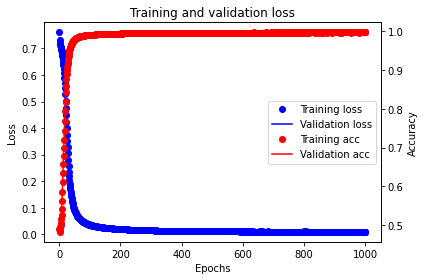

In [18]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


epochs = range(1, len(loss) + 1)
fig, ax1 = plt.subplots()

l1 = ax1.plot(epochs, loss, 'bo', label='Training loss')
vl1 = ax1.plot(epochs, val_loss, 'b', label='Validation loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2 = ax1.twinx()
ac2= ax2.plot(epochs, accuracy, 'o', c="red", label='Training acc')
vac2= ax2.plot(epochs, val_accuracy, 'r', label='Validation acc')
ax2.set_ylabel('Accuracy')

lns = l1 + vl1 + ac2 + vac2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc="center right")
fig.tight_layout()
fig.savefig("acc+loss_drop.pdf")
fig.show()

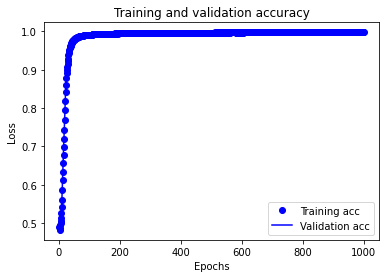

In [19]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Performance summary and dropout vs no dropout

In [20]:
class_dropout = keras.models.load_model('../models/classifier/{}_dropout.h5'.format(n))
class_nodropout = keras.models.load_model('../models/classifier/{}_nodropout.h5'.format(n))

In [21]:
class_dropout.fit(x_val, y_val)
class_nodropout.fit(x_val, y_val)

1266/1266 [==============================] - 2s 1ms/step - loss: 0.0299 - accuracy: 0.9921


In [22]:
class_dropout.fit(x_train, y_train)
class_nodropout.fit(x_train, y_train)

3797/3797 [==============================] - 6s 2ms/step - loss: 0.0188 - accuracy: 0.9940


## Probability density distribution